# Gradient descent methods

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

Here we focus on the minimization of general functions of the form: 
$$\min_{x\in\mathbb{R}^n} f(x).$$

the purpose of this practical session is to write descent algorithms, and evaluate performances, using the following function: 
$f(x,y) = 100(y-x^2)^2 + (1-x)^2$ (Rosenbrock function).

We denote $\textit{oracle}$ a routine that for a given $x$, returns $f(x)$, the gradient $\nabla f(x)$ (or approximation) it it exists, and eventually the Hessian $H[f](x)$ (or approximation) if it exists:

$$[f(x),\nabla f(x),H[f](x)] = \textrm{oracle}(x)$$

TODO: compute the gradient and Hessian for the rosenbrock function

**TODO:** write here gradient and hessian

In [3]:
def oracle(x):
    try:
        I = np.eye(1)
        f = 100 * ( x[1] - x[0] ** 2 ) **2 + (I - x[0])**2
        df = np.zeros(2)
        df[0] = - 400 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0])
        df[1] = 200 * (x[1] - x[0]**2)
        Hf = np.zeros((2,2))
        Hf[0][0] = - 400 * (x[1] - x[0] ** 2) + 800 * x[0] ** 2 + 2
        Hf[0][1] = - 400 * x[0]
        Hf[1][0] = - 400 * x[0]
        Hf[1][1] = 200
        return f,df,Hf
    except:
        print("Could not compute function, gradient or hessian")
        return None, None, None

Let us recall the GD process

    Data : 𝑥0∈ℝ𝑛

initial point and oracle.
Init : iteration 𝑘=0
.
While convergence not reached, do

    Compute descent direction 𝑑𝑘

.
Choose or compute learning rate 𝑠𝑘
.
Update 𝑥𝑘+1
.
𝑘=𝑘+1.

    TO DO : analytic solution:

Compute stationary points for rosenbrock, characterize the stationary point(s)

>**TODO :** compute mathematical solution

In [4]:
def Gradient(function,h=0.1,xini=np.array([0.,0.])):
    x = np.copy(xini)
    y=[x]
    eps = 1e-10
    itermax = 10000
    err = 2*eps
    iter = 0
    try:
        while err>eps and iter<itermax:
            f,df,Hf = function(x)
            x = x - h * df
            y.append(x)
            err = np.linalg.norm(df)
            iter += 1
        xiter=np.array(y)
    except:
        print("Could not converge")
    return x,xiter,iter

In [5]:
def Newton(function,xini=[0,0]):
    x = np.copy(xini)
    y=[x]
    eps = 1e-10
    itermax = 1000
    err = 2*eps
    iter = 0
    while err>eps and iter<itermax:      
        f,df,Hf = function(x)     
        x = x - np.dot(np.linalg.inv(Hf),df) 
        y.append(x)
        err = np.linalg.norm(df)
        iter += 1
    xiter=np.array(y)
    return x,xiter,iter

> **Visualization :** Understand the following routine that plots level lines of the function, as well as the iterative minimization points

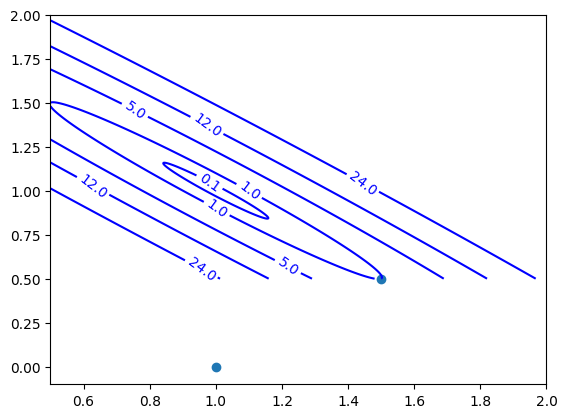

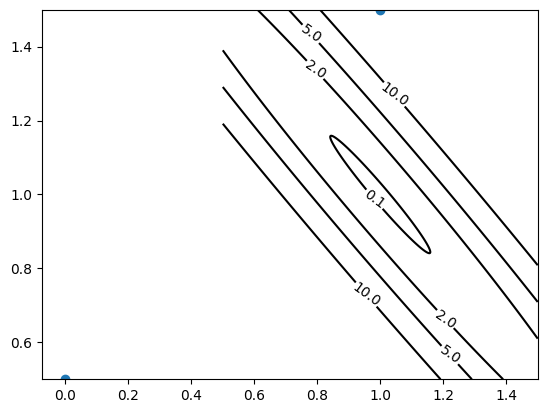

In [6]:
Nx = 1000
Ny = 1000
x = np.linspace(0.5,2,Nx)
y = np.linspace(0.5,2,Ny)
X, Y = np.meshgrid(x, y)
Z = 100*(X+Y-2)**2+(X-Y)**2
CS=plt.contour(X, Y, Z,[0,0.1,1,5,12,24],colors='b')
plt.clabel(CS, inline=1, fontsize=10)
z = [[1,1.5],[0,0.5]]
plt.scatter(z[0],z[1],marker='o')
plt.show()
def affichage(xiter) :
    Nx = 1000
    Ny = 1000
    x = np.linspace(0.5,1.5,Nx)
    y = np.linspace(0.5,1.5,Ny)
    X, Y = np.meshgrid(x, y)
    Z = 100*(X+Y-2)**2+(X-Y)**2
    CS=plt.contour(X, Y, Z,[0,0.1,2,5,10],colors='k')
    plt.scatter(xiter[:,0], xiter[:,1],marker='o')
    plt.clabel(CS, inline=1, fontsize=10)

affichage(np.array(z))
plt.show()

Objective: test first order, second order descent methods with various init points and step sizes, and conclude

/tmp/ipykernel_22222/3464558540.py:4: RuntimeWarning: overflow encountered in scalar power
  f = 100 * ( x[1] - x[0] ** 2 ) **2 + (I - x[0])**2
/tmp/ipykernel_22222/3464558540.py:6: RuntimeWarning: overflow encountered in scalar multiply
  df[0] = - 400 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0])
/tmp/ipykernel_22222/1771555617.py:11: RuntimeWarning: invalid value encountered in subtract
  x = x - h * df


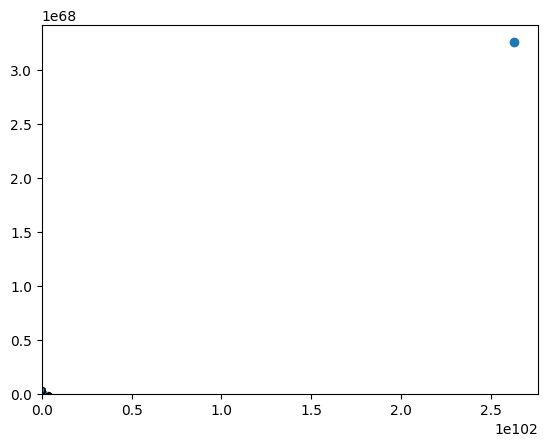

a : convergence vers  [nan nan]  nb iterations :  10


In [7]:
# convergence usuelle
x,xiter,t=Gradient(oracle)
affichage(xiter)
plt.show()
print("a : convergence vers ",x," nb iterations : ",t)

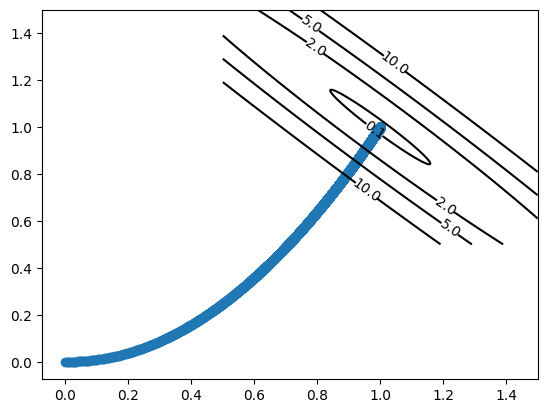

b : convergence vers  [0.99989798 0.99979556]  nb iterations :  10000


In [8]:
#Test2 : pour faire converger la descente, on prend des pas minuscules
x,xiter,t=Gradient(oracle,h=2e-3)
affichage(xiter)
plt.show()
print("b : convergence vers ",x," nb iterations : ",t)

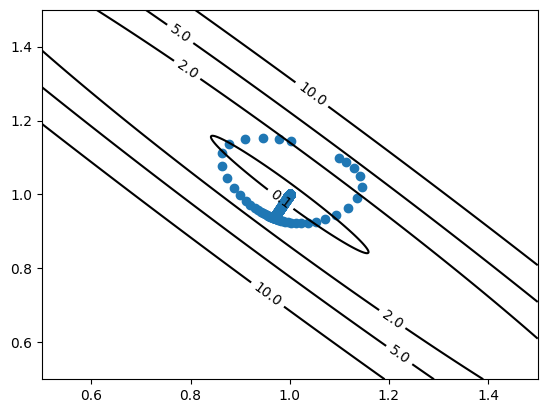

b : convergence vers  [0.99998922 0.9999784 ]  nb iterations :  10000


In [9]:
#Test3 : pour faire converger le test1, on se rapproche du min
# Cela ne fonctionne toujours pas, le pas est trop gros
x,xiter,t=Gradient(oracle,h=2e-3,xini=[1.1,1.1])
affichage(xiter)
plt.show()
print("b : convergence vers ",x," nb iterations : ",t)

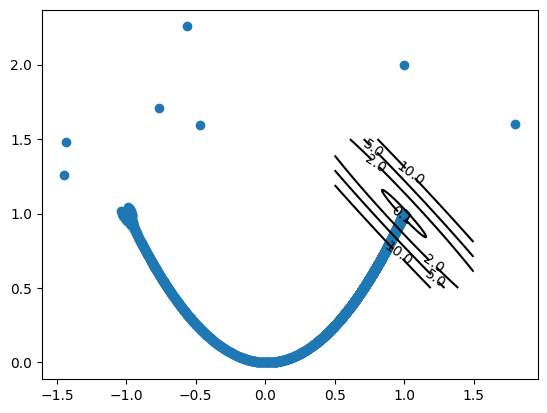

d : convergence vers  [0.99986198 0.99972342]  nb iterations :  10000


In [10]:
# AAnother funny case
x,xiter,t=Gradient(oracle,xini=[1,2],h=2e-3)
affichage(xiter)
plt.show()
print("d : convergence vers ",x," nb iterations : ",t)

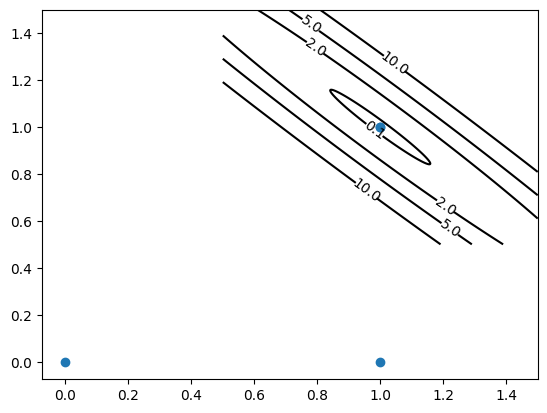

e : convergence vers  [1. 1.]  nb iterations :  3


In [11]:
#Test4 : convergence pour Newton
x,xiter,t=Newton(oracle)
affichage(xiter)
plt.show()
print( "e : convergence vers ",x," nb iterations : ",t)

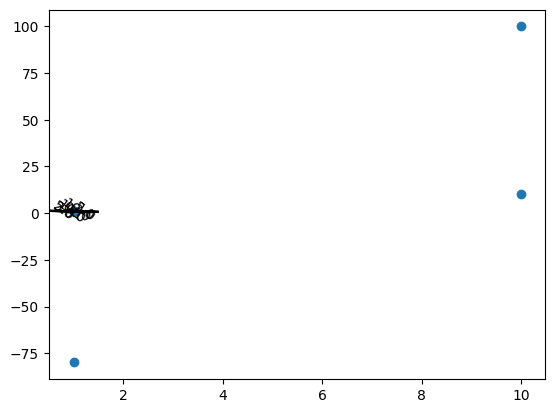

f : convergence vers  [1. 1.]  nb iterations :  6


In [12]:
#Test1 : Newton, on s'éloigne un peu du min, cela fonctionne
x,xiter,t=Newton(oracle,xini=[10,10])
affichage(xiter)
plt.show()
print( "f : convergence vers ",x," nb iterations : ",t)

##  Bonus, implement heavy-ball method
where $x_{t+1} = x_t -\alpha \nabla f + \beta (x_t-x_{t-1})$

## Second bonus:
Change function to $f(x,y) = (y-x^2)^2 + (1-x)^2$. Do you observe better convergence?

# Gradient descent for linear regression

Lets assume a hypothetical experiment in which students of agriculture science collected some data from different farms/green houses through out many years. What we want to do is predict harvests $y$ of different farms/green houses given Average Temperature $x_1$ and Average Nitrite In Soil $x_2$. For this we have made some assumptions based on initial analysis of the data.

Let us assume a simple linear model $y = w_0 + w_1 x_1 + w_2 x_2$

We will here use a gradient descent method to solve this linear system.


In [ ]:
import numpy as np

# number of data points
nb_pts=100

# np.random.randn(100) will give array of 100 normally distributed random 
# numbers with mean 0 and std-dev 1

# 2*np.random.randn(100)+12 changes the normal distrubution to have mean 12 and std-dev 2
nitrate = 2*np.random.randn(nb_pts)+12
temperature = 4*np.random.rand(nb_pts) + 26

# np.c_ concatinates (joins) two array column wise
x_farm = np.c_[nitrate,temperature]

# This is imaginary equation describing relation between yeild, nitrate and temperature.
# Obiously this is not know in real world problem. We are using it to generate dummy data.
yeild_ideal = .1*nitrate + .08*temperature +.6

# adding some noise on the ideal equation. 
# The noise is normally distributed with 0 mean and std-dev 0.4
yeild = yeild_ideal + .4*np.random.randn(nb_pts)

print("few instances of generated data \n", x_farm[:5])
print("few instances of generated targets \n", yeild[:5] )

In [ ]:
def add_bais_term(x):
    
    # np.ones(n) will give new array of length n whose all elements are 1 
    # np.c_ concatinates two array column wise
    return np.c_[np.ones(len(x)),x]


# Root mean square cost function
def rmse_cost_func(P,Y):
    ## model is array with bais and coffecients values
    rmse = ## YOUR CODE HERE
    return rmse


# Finds gradient of cost function using eq(5.2) above
def gradient_of_cost(x,y,model):
    preds = predict(x,model)
    
    error_term = preds-y
    
    # np.matmul performs matrix multiplication
    # x.T is transpose of matrix x
    xt_dot_error_term = ## YOUR CODE HERE, gradient of linear regression method
    return xt_dot_error_term

# Do prediction using eq(5.1) above
def predict(x,model):
    #np.matmul performs matrix multiplication
    return np.matmul(x,model)

In [ ]:
# find optimum values of bais and coefficient using gradient descent
def find_linear_regression_model(x,y):
    n_epochs = 1000000
    eps = 0.1
    neta = 0.001
    err = 2*eps
    iter=0
    
    # Initialize all parameters(wj's) to zero
    model = np.zeros(len(x[0]))
    
    # do n_epochs iteration
    while err>eps and iter<n_epochs:
        # compute gradient
        grad = gradient_of_cost(x,y,model)
        # compute error
        err=rmse_cost_func(predict(x,model),y)
        # move parameters closer to optimum solution in every step 
        next_model = model - neta*grad
        model = next_model
        iter += 1
    return model

In [ ]:
# add bias term
x_farm_with_bais = add_bais_term(x_farm)
# compute model
model = find_linear_regression_model(x_farm_with_bais, yeild)
print("\nmodel(w0,w1,w2)\n", model)
# ideal model: 0.6 + .1*nitrate + .08*temperature

# Another Gradient descent method for regression

In [ ]:
import pandas as pd
import plotly_express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot

In [ ]:
#set notebook mode
init_notebook_mode(connected=True)

In [ ]:
#read data using panda frame
import os
print(os.getcwd())
df = pd.read_csv("../TP-Regression/possum.csv")
df = df.drop('case', axis=1)
df.head()

In [ ]:
n_rows = df.shape[0]
# extract x values
X=df['chest'].to_numpy().reshape(n_rows)
#extract some Y data
y=df['belly'].to_numpy().reshape(n_rows,1)

In [ ]:
# plot the input data
plt.scatter(X,y)
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
z = np.linspace(np.min(X),np.max(X))
plt.plot(z, z+5, 'r')

In [ ]:
A=np.c_[X,np.ones(len(X))]
A.shape

In [ ]:
y.shape

In [ ]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [ ]:
compute_cost(A,y)

In [ ]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
#         print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%%time
num_iterations=50000
theta_init=np.array([[1],[3]])
alpha=0.001
theta, J_history, theta0_history, theta1_history = gradient_descent(A,y, theta_init,
                                                                   alpha, num_iterations)

In [ ]:
theta

In [ ]:
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [ ]:
# plot the input data
plt.scatter(X,y)
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
z = np.linspace(np.min(X),np.max(X))
plt.plot(z, theta[0]*z+theta[1], 'r')

### If we compare the results of GD, with direct solving of the mean-square problem, what can you conclude?